# EPSCs peaks
 

## Introduction

* ### What's EPSC?

<img src="pc.jpg" >

Patch-clamp is a technique used to study ionic currents of cell membrane.
By the patch clamp method, it is possible to record the electrical events occurring in a postsynaptic cell as a result of neurotransmitters’ release by the presynaptic terminal and the consecutive opening of ionotropic receptors. In the “voltage clamp” mode, the voltage is kept constant, so it is possible to record the current passing through the open ion channels, called “postsynaptic current” (PSC).

For an excitatory synapse, the binding of neurotrasmitters induces the opening of cationic channels, which is depolarizing the cell. The induced electrical events are called <b>“excitatory postsynaptic currents” (EPSCs)</b>.

Recording and analysing EPSCs is the powerful and popular technique for comparing excitability of neurons in desease models and control. For example, in my past lab in Marseille we observed excitability in neurons from TSC knock-out mice and we were able to find the receptor target to treat this abnormality. 

<img src="TSC_EPSCs.jpg" >
DOI: 10.1038/ncomms5563

Here, we detected EPSCs, quantified the EPSCs frequency, align them by peak, averaged and found the difference in the shape of TSC-KO EPSCs. 


## Load abf file

Electrophysiologists who use patch-clamp technique often use Axon Instruments Multiclamp  amplifiers to measure currents and potentials of neurons in the brain slices. It means, we always deal with abf files (Axon Binary Format). In this class I want to show you one of the ways to identify peaks of Excitatory Postsynaptic currents (EPSCs).
So, first step will be the opening the data files in ABF format. For this we will use the [pyabf module](https://pypi.org/project/pyabf).</font>

Some sample data, `learn024.abf`, will be used in this class. Let's import the `pyabf` module and use it to open abf file:


In [1]:
import pyabf as pa               # package for loading abf data
import scipy.signal as ss        # Scientific package for signal processing
import numpy as np               # for numpy array objects
import matplotlib.pyplot as plt  # Plotting package to visualize data
import seaborn as sns

### Exercise:

Please create the string variable `abf_file` and assign the name of the file needed to open - `learn024.abf`

In [2]:
# Answer
abf_file = 'learn024.abf'

Pass this filename as an argument into the loading function of pyabf. Syntaxis: `pa.ABF("your_file_name")`. Save the result in the object `data_file`

In [3]:
# Answer
data_file = pa.ABF(abf_file)

Let's use the functions `print` and `.format` to see how this data looks like.
The result should be something like:
`data_file is an ....`

In [4]:
# Answer
print("data_file is an {0}".format(data_file))

data_file is an ABF (version 1.8.3.0) with 4 channels (pA, pA, mV, mV), sampled at 20.0 kHz, containing 10 sweeps, having no tags, with a total length of 0.46 minutes, recorded with protocol "JAF 1 electrode  ST-EPSC".


Check what type of data we've loaded by calling the `type` function.

In [5]:
# Answer
type(data_file)

pyabf.abf.ABF

`data_file` is an object of class `ABF`. The `ABF` class is provided by the `pyabf` module (abbreviated `pa` in our code). Let's see what methods and attributes are provided by the `ABF` class. Remember that you can look up these methods and attributes by typing the name of the variable followed by a period and then hitting `TAB`. 

### Exercise:
Print the date when the file was created

In [6]:
# Answer 
print(data_file.abfDateTimeString)

2018-08-31T15:42:36.734


You'll notice two names, `sweepLabelX` and `sweepUnitsX` in the list of methods and attributes on `data_file`. What are these? Are they methods or attributes? How can you learn a little more about them?

In [7]:
# Answer
print(data_file.sweepLabelX)
print(data_file.sweepUnitsX)

Time (seconds)
sec


### Exercise:

Create two new variables: `time` and `current` and assign arrays of time and current values of the `data_file`. 

In [8]:
# Answer
time = data_file.sweepX
current = data_file.sweepY

### Exercise:
Print the types of 'time' and 'current' variables. Use `.format` to make your output more readable. 

In [9]:
# Answer
print("the type of time is: {0}".format(type(time)))
print("the type of current is {0}".format(type(current)))

the type of time is: <class 'numpy.ndarray'>
the type of current is <class 'numpy.ndarray'>


Cool! The data type returned here are `numpy` arrays. We've worked with these already in previous classes. 

### Excercise
What are the dimensions of `time` and `current`? In other words, what are their shapes?

In [10]:
# Answer
print(time.shape)
print(current.shape)

(50000,)
(50000,)



### Exercise

As a review from last week, how would we select only the current at the 34th time sample?

Once you've extracted the current at the 34th time sample, please print the following string, `The current at sample 34 is XX YY` where XX is the current and YY is the unit (e.g., picoamps, nanoamps, etc.). *As a bonus, format the current value so it only prints the first two decimal places. Not sure how to do this? Use Google!

In [11]:
# Answer 
c_34 = current[34]
print("The current at this time is {0} {1}".format(c_34, data_file.sweepUnitsY))

# using f-strings:
i = 34
string = f"The current at sample {i} is {current[i]:.2f} {data_file.sweepUnitsY}"
print(string)

# using format
i = 34
string = "The current at sample {i} is {value:.2f} {units}".format(i=i, value=current[i], units=data_file.sweepUnitsY)
print(string)

The current at this time is -32.958984375 pA
The current at sample 34 is -32.96 pA
The current at sample 34 is -32.96 pA


### Exercise: 
* Great, we know that the 34th sample recorded a current of -33 pA, but what if we wanted to know what was going at a particulur time, in seconds? To figure this out, we need to calculate the rate at which the data was sampled. As a hint, the difference between consecutive timepoints gives us the period. Save the calculated value in a variable, `sample_rate`.
* After you've successfully done this, use `sample_rate` to figure out what the current was at 0.5 seconds and print the following string `The current at XX sec is YY ZZ` where XX is the timepoint, YY is the current and ZZ is the unit of the current.



In [12]:
# Answer
sample_period = time[1] - time[0]
sample_rate = 1/sample_period
timepoint = 0.5
sample = int(round(sample_rate * timepoint))
value = current[sample]

string = f"The current at {timepoint} sec is {value:0.2f} {data_file.sweepUnitsY}"
print(string)

The current at 0.5 sec is -39.06 pA



### Excercise
Let's extract the current from 0.1 to 0.2 sec and save it in a new variable, `data_slice`.


In [13]:
# Answer:
t1_index = int(round(sample_rate * 0.1))
t2_index = int(round(sample_rate * 0.2))

data_slice = current[t1_index:t2_index]

print(data_slice)

[-34.1797 -25.6348 -43.9453 ... -53.7109 -40.2832 -52.4902]


#### Let's briefly summarize what we've done so far - 
* loaded data, 
* figured out data types, 
* calculated the sampling rate and 
* did a refresher on how to slice data from a numpy array.

# Plotting the data trace
To visualize this data, we will use the package `matplotlib.pyplot`, which imported at the beginning as `plt`


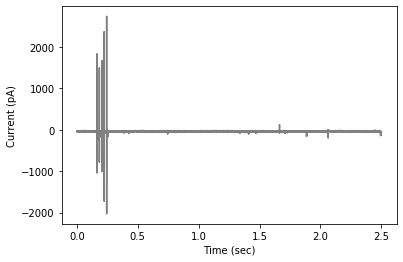

In [14]:
# Create a matplotlib figure and plot the trace. Note how we label the axes
plt.figure()
plt.plot(time, current, color='grey')
plt.xlabel('Time (sec)')
plt.ylabel('Current (pA)')
plt.show()

 <img src="slice1.jpg" width=300 >

In our lab, we study synaptic transmission in Solitary nucleus (NTS) which is innervated by Solitary Truct and is a first reciever of information from peripheral neuros system. 
This trace is a patch-clamp recording from the NTS neuron in the slice including Solitary truct. The "artifacts" on the beginning caused by electric stimulation of the solitary truct. This stimulation evokes synchronous synaptic responses of NTS neurons from solitary truct, we call them *synchronous EPSCs*. Increasing stimuli intensity, we are able to see the thresholds for monosynaptic input and higher order connections on the neuron. You can get a lot of information about the network from the stimuli intensity thresholds, responce delay, shape and amplitude.
Let's look close on them. 

### Exercise:
* Using `plt.ylim((bottom, top))` shrink the Y axis from -500 to 100 pA.
* Also shrink the x-axis in order to zoom in on the artifacts between 0.03 and 0.07 sec. See if you can figure out what function can perform this action.
* Be sure to label the x and y axes.

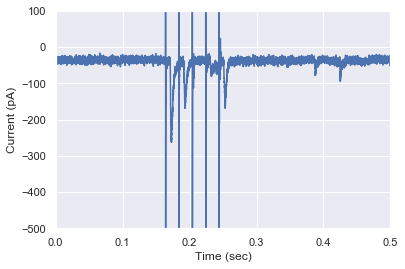

In [19]:
# Answer
sns.set(style="darkgrid")
plt.figure()
plt.plot(time, current)
plt.xlabel('Time (sec)')
plt.ylabel('Current (pA)')
plt.ylim((-500, 100))
plt.xlim((0, 0.5))
plt.show()

### Exercise:
* That looks good. But more often electrophysiologists need to analyse not evoked but spontaneous EPSC. So let's move the focus to the interval from 0.3 to 0.4 second of my recording, where we can see them. 
* To do this, we first need to locate the correct indexes. Please do this and save this indexes as two new variables: `t_03` and `t04`


In [21]:
# Answer
t_03 = int(round(sample_rate * 0.3))
t_04 = int(round(sample_rate * 0.4))


### Exercise:
* Use these indexes to slice out the current trace betwee 0.3 and 0.4 seconds.
* Save this data into two new arrays `short_time` and `short_data`.
* Finally, plot this data


Text(0, 0.5, 'Current (pA)')

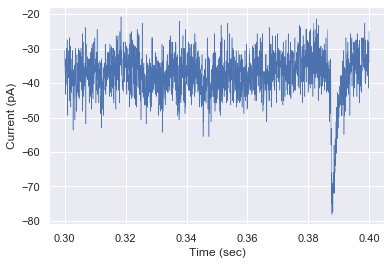

In [22]:
# Answer
short_data = current[t_03:t_04]
short_time = time[t_03:t_04]

plt.figure()
plt.plot(short_time, short_data, lw=.5)
plt.xlabel('Time (sec)')
plt.ylabel('Current (pA)')

# Low-pass Filter 

Without filtering EPSC recordings are usually quite noisy, making them difficult to read. Therefore, before analysis it is common to first filter everything above 1 kHz. We will do this by designing a low-pass butterworth filter using scipy's `signal` module.

Filtering data requires two steps:

* Designing the filter. A filter consists of two sets of coefficients, conventionally known as `b` and `a`. To calculate these coefficients, we use the `iirfilter` function available via `scipy`. Take a look at the documentation for the function. How many arguments are required? Hint. You can tell based on the number of parameters that do not have default values set.
* Applying the filter. This can be done using `filtfilt`, which takes the filter coefficients and the data to be filtered.

Let's start with a first-order butterworth filter with a cutoff frequency of 1000 Hz. We have to convert the cutoff frequency to a normalized frequency, `Wn`. Normalized frequency is defined as the number of half-cycles per sample (as indicated by the docstring for `iirfilter`, also can be thought of as a fraction of Nyquist frequency):

    f_cutoff = 1000
    Wn = f_cutoff / (sample_rate/2)

In [23]:
# Design the filter
f_cutoff = 1000
Wn = f_cutoff / (sample_rate/2)
b, a = ss.iirfilter(1, Wn, ftype='butter', btype='low')

Next, we will apply to our "short" data

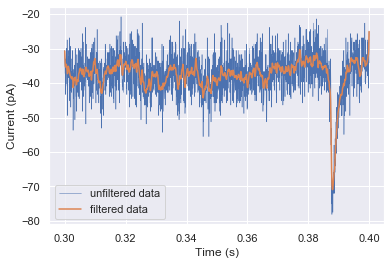

In [24]:
# Apply the filter
filtered_data = ss.filtfilt(b, a, short_data) #filtering

# plot the filtered data
plt.figure()
plt.plot(short_time, short_data, lw=.5) #non-filtered data
plt.plot (short_time, filtered_data)    #filtered data on top
plt.xlabel('Time (s)')
plt.ylabel('Current (pA)')
plt.legend(['unfiltered data', 'filtered data'])

# Power Spectral Density

Power Spectral Density (PSD) is very usefull to check did the filter work properly.
There is the function `psd` in the `matplotlib.pyplot` module which we imported as `plt`.
### Exercise
* Using documentation, figure out hoe to use `psd` function
* Plot PSD of both `short_data` and `filtered_data`
* Make the axis of frequencies logarithmic. Hint: xscale('log')

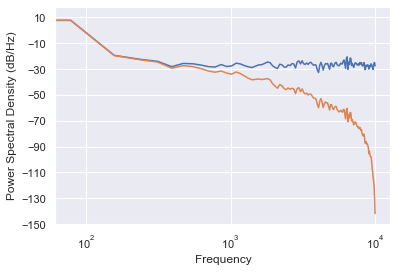

In [25]:
# Answer
plt.psd(short_data, Fs=sample_rate);
plt.psd(filtered_data, Fs=sample_rate)
plt.xscale('log')

Let's low-filter the signla with cut-off frequency 200 Hz and see what will happend with the signal and it's PSD. 

### Exercise
* Design the filter with cut-off frequency 200 Hz.
* Filter the `short_data` and save the result in new `filtered_data200` array
* plot `filtered_data` and `filtered_data200` on top of each other
* Label axises and add the legend 

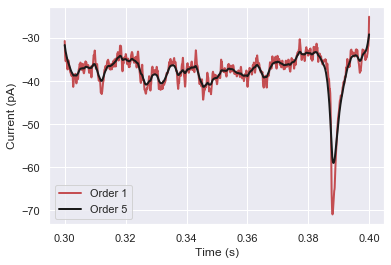

In [26]:
# Answer
f_cutoff = 200
Wn = f_cutoff / (sample_rate/2)
b, a = ss.iirfilter(1, Wn, ftype='butter', btype='low')#designing the filter
filtered_data200 = ss.filtfilt(b, a, short_data) #filtering
#Plotting
plt.figure()
plt.plot(short_time, filtered_data,'r' ,lw=2) #non-filtered data
plt.plot (short_time, filtered_data200, 'k', lw=2)    #filtered data on top
plt.xlabel('Time (s)')
plt.ylabel('Current (pA)')
plt.legend(['Order 1', 'Order 5'])

Let's see how PSD changed

### Exercise
* plot PSD of all three signals: short_data, filtered_data and filtered_data200.
* Make the axis of frequencies logarithmic
* Add the legend

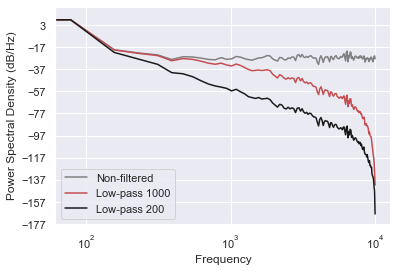

In [27]:
# Answer
plt.psd(short_data, Fs=sample_rate, color='grey')
plt.psd(filtered_data, Fs=sample_rate, color='r')
plt.psd(filtered_data200, Fs=sample_rate, color='k')
plt.xscale('log')
plt.legend(['Non-filtered','Low-pass 1000', 'Low-pass 200'])

# Find the location of EPSC peaks

We have reviewed a big topic of e-phys analysis, data filtering.
Let's come back to the main topic of the EPSC peaks finding.
Knowing the EPSC peak times, we can make lots of different analisys. We can avarege EPSCs, quantify the frequensy, amplitude, decay time etc. 
We will test `argrelmin` function from `scipy.signal` module for this.

 **scipy.signal.argrelmin(data, axis=0, order=1, mode='clip')**
 
    Calculate the relative minima of data.
    Parameters:
            data : ndarray         #Array in which to find the relative minima.
            axis : int, optional   #Axis over which to select from data. Default is 0.
            order : int, optional  #How many points on each side to use
                                   #for the comparison to consider comparator(n, n+x) to be True.
            mode : str, optional   #How the edges of the vector are treated. Available options are ‘wrap’ 
                                   #(wrap around) or ‘clip’ 
                                   #(treat overflow as the same as the last (or first) element). 

    Returns:	
            extrema : tuple of ndarrays
                                   #Indices of the minima in arrays of integers. 
                                   #extrema[k] is the array of indices of axis k of data.


### Exercise:
We imported already `scipy.signal` module as `ss`.

Using the `argrelmin` function, find the relative minima of `filtered_data` and save them to the new tuple *argrelmin_res*.
Print result.

In [28]:
# Answer
argrelmin_res = ss.argrelmin(filtered_data)
print (argrelmin_res)

(array([   6,   18,   41, ..., 1974, 1977, 1983], dtype=int64),)


That's deffinitely not what we expected. Let's change the parameters of the function. Order (How many points on each side to use) sounds right. Let's change it to 1000 and run the function one more time.

In [29]:
argrelmin_res = ss.argrelmin(filtered_data, order=1000)
print (argrelmin_res)

(array([1759], dtype=int64),)


# Mask data based on current threshold

This looks better, but still not exactly what we need. 
Let's say, we don't need to identify any events lower they 50 pA in amplitude.
We can create the logic mask, there ">-50" is no events (False) and "<-50" means current is higher then 50 pA by amplitude, mask value will be "True". 


In [30]:
threshold = -50   # Don't want to call anything below -50 pA an EPSC event

# create a "mask" over all the data that meets this criteria
mask = filtered_data < threshold

[False False False ... False False False]


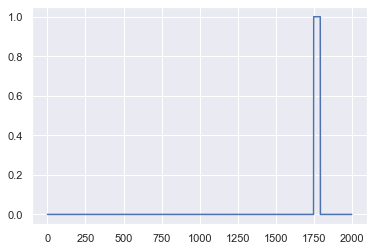

In [31]:
# see how mask is just an array of true and false?
print(mask)
plt.plot(mask)

 Function `argrelmin` returns a  tuple of arrays, and the return value is a tuple even when data is one-dimensional. Thus, the array of peaks will be argrelmin_res[0]

In [32]:
all_peaks = ss.argrelmin(filtered_data, order=1000)[0]
print (all_peaks)

[1759]


That gaves us 5 peaks, as we saw above. We only actually was the three. So, now we use the mask to only keep
peaks ocurring when the traces was bigger than threshold.
Below there is a small loop sorting out the peaks not overlapping with mask.

In [33]:
EPSC_peaks = []  #empty array for saving the right peaks in

for peak in all_peaks:
    if mask[peak] == True:         #overlapping with mask     
        EPSC_peaks.append(peak)    #add this peak to the end of EPSC_peaks array
    else:
        pass

print("These were all peaks detected by argrelmin: {0}".format(all_peaks))

print("Only these peaks: {0} exceeded the threshold of -50 pA".format(EPSC_peaks))

These were all peaks detected by argrelmin: [1759]
Only these peaks: [1759] exceeded the threshold of -50 pA


Now, let's plot these peaks overlayed on the trace to confirm we ID'd the right ones.

### Exercise:
* Plot `filtered_data` currents vs time. Make it grey (color='grey') 
* Plot EPSC peaks as black stars ("*", color='k', markersize=10) on top of the current trace. 

Hint:`EPSC_peaks` array stores the indexes of EPSC peaks. The times of EPSC peaks are `short_time[EPSC_peaks]` and the current values in these point are `filtered_data[EPSC_peaks]`.


Text(0, 0.5, 'Current (pA)')

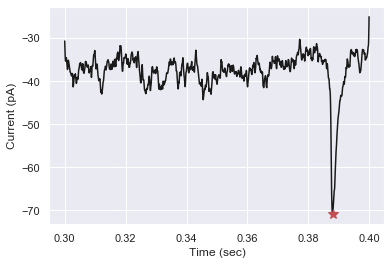

In [37]:
# Answer
plt.figure()
plt.plot(short_time, filtered_data, color='k')
plt.plot(short_time[EPSC_peaks], filtered_data[EPSC_peaks], "*", color='r', markersize=10)
plt.xlabel('Time (sec)')
plt.ylabel('Current (pA)')

Now, we are going to combine everything we've done below for analysing the bigger piece of data. 
We still have the entire recording of current values saved as `current = data_file.sweepY` and time as `time = data_file.sweepX`

## Exercise:

Extract data from 0.08 to 0.4 sec. Save current and time arrays as `time1` and `current1` 

In [38]:
# Answer
start = int(round(0.08*sample_rate))
end = int(round(0.4*sample_rate))
time1 = time[start:end]
current1 = current[start:end]

## Exercise:

Lowpass filter `current1` with a butterworth using a cutoff of 1000 Hz.
Save to `current1_filtered`

In [39]:
# Answer
f_cutoff = 1000
Wn = f_cutoff/(sample_rate/2) # normalized cutoff frequency  
b, a = ss.iirfilter(1, Wn, ftype='butter', btype='low')#designing the filter
current1_filtered = ss.filtfilt(b, a, current1) #filtering

Create the variable `thresh` and set it equal to -47.

In [40]:
# Answer
thresh = -47

Finally, create the array `mask` with logical values, where *current value < thresh* is  *True*  for `current1_filtered`

In [41]:
# Answer
mask = current1_filtered < thresh

Now finding EPSC peaks

## Exercise:

* Using `argrelmin` with order = 25, create array `all_peaks` with minimas of `current1_filtered`
* Print `all_peaks`


In [42]:
# Answer
all_peaks = ss.argrelmin(current1_filtered, order=25)[0]
print (all_peaks)

[  29  102  241 ... 6065 6159 6338]


# Exercise:

This code has a mistake and won't run. Please fix the mistake and run it:

    # Use mask to screen for real peaks
    EPSC_peaks = []

    for peak in all_peaks:
        if mask[peak] = True:
            EPSC_peaks.append(peak)
        else:
            pass


In [43]:
# Answer
EPSC_peaks = []

for peak in all_peaks:
    if mask[peak] == True:
        EPSC_peaks.append(peak)
    else:
        pass


# Exercise:

Plot this results to see if it makes any sense:
* Plot `current1_filtered` in it's time axis in grey color
* Plot `EPSC_peaks` as big red stars on top of it
* Plot `all_peaks` as black dots on top of everything

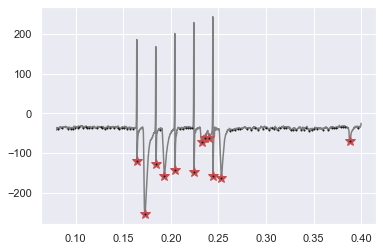

In [44]:
# Answer
plt.figure()
plt.plot(time1, current1_filtered, 'grey')
plt.plot(time1[(EPSC_peaks)], current1_filtered[(EPSC_peaks)], '*', color='r', markersize=10)
plt.plot(time1[(all_peaks)], current1_filtered[(all_peaks)], '.', color='k', markersize=2)

# Exercise:
* Using **numpy.mean** and **numpy.std** functions, calculate and print mean and standard deviation of EPSC peak amplitude.

In [45]:
# Answer
print ("EPSC peak amplitude is {} +/- {}".format\
       ( np.mean(current1_filtered[(EPSC_peaks)]) , np.std(current1_filtered[(EPSC_peaks)])))

EPSC peak amplitude is -128.3037559667666 +/- 53.555488519132666


* calculate EPSC frequency as number of events in one second. Hint: `EPSC_peaks is a list`, you can get it's lenth - **len(Your_list)**

In [46]:
# Answer
Dur_in_sec = len(current1_filtered)/sample_rate
PF = len(EPSC_peaks)/Dur_in_sec 
print("EPSC frequency is {} Hz".format(PF))

EPSC frequency is 37.5 Hz


# Summary

   * **pyabf** loads ABF files and presents data in `numpy` format
   * Low-pass Butterworth filter works in two steps
   * `argrelmin` from **scipy signal** works well but might require some additional tweaks to get it to work the way you want
   
# Thank you! 
   